# Resampling Datetime Data

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
import statsmodels.tsa.api as tsa
import datetime as dt

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")


# Part 1: 

In [2]:
df = pd.read_csv('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
15337,20201228,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
15338,20201229,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN
15339,20201230,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN


In [3]:
#Convert date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [4]:
#Set the date column as the index
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [5]:
#Filter out only columns that are needed.
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


In [6]:
#Checking missing values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
#Imputing missing data in temperatures by interpolation & precipication and snow_depth with the value '0'
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

# Part 2:

## Question #1: What month had the most precipitation between 2000 through 2010?

In [9]:
df_q1 = df.copy()

In [39]:
precipitation = ['precipitation']
df_q1_ts = df.loc['2000':'2010',precipitation]

In [46]:
ts = df_q1_ts['precipitation']
ts_M = ts.resample('M').max()
ts_M.name = 'Resampled'
ts_M.head()

date
2000-01-31    6.00
2000-02-29   16.80
2000-03-31    7.20
2000-04-30   17.20
2000-05-31   19.00
Freq: M, Name: Resampled, dtype: float64

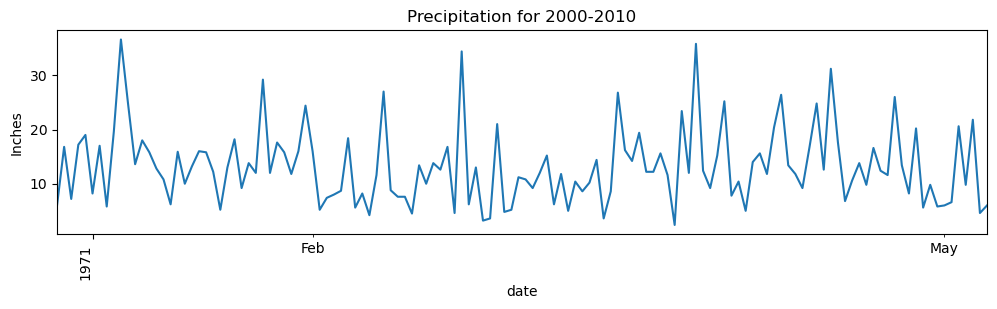

In [52]:
## Plot the data
ax = ts_M.plot(figsize=(12,3))
ax.set(title='Precipitation for 2000-2010', ylabel='Inches')

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90);

In [57]:
#The month with the most precipitation:
most_rain = ts_M.idxmax()
print(f'The month with the most precipitaiton between 2000-2010 was: {most_rain}.')

The month with the most precipitaiton between 2000-2010 was: 2000-10-31 00:00:00.


## Question # 2:  Which year between 2000-2020 had the coolest average temperature?

In [66]:
df_q2 = df.copy()
df_q2

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,0.00
2020-12-28,0.20,1.10,-1.30,3.60,0.00
2020-12-29,0.00,2.60,1.10,4.10,0.00


In [79]:
ts2 = df_q2.loc['2000':'2020']
ts2 = df_q2.resample('Y').mean()['mean_temp']
ts2.name = 'Resampled'
ts2

date
2000-12-31   11.58
2001-12-31   11.33
2002-12-31   12.08
2003-12-31   12.11
2004-12-31   11.90
2005-12-31   11.82
2006-12-31   12.29
2007-12-31   11.94
2008-12-31   11.33
2009-12-31   11.72
2010-12-31   10.66
2011-12-31   12.37
2012-12-31   11.30
2013-12-31   11.17
2014-12-31   12.66
2015-12-31   12.12
2016-12-31   11.91
2017-12-31   12.24
2018-12-31   12.50
2019-12-31   12.21
2020-12-31   12.72
Freq: A-DEC, Name: Resampled, dtype: float64

In [92]:
fmt_minor = mdates.DateFormatter("%Y")

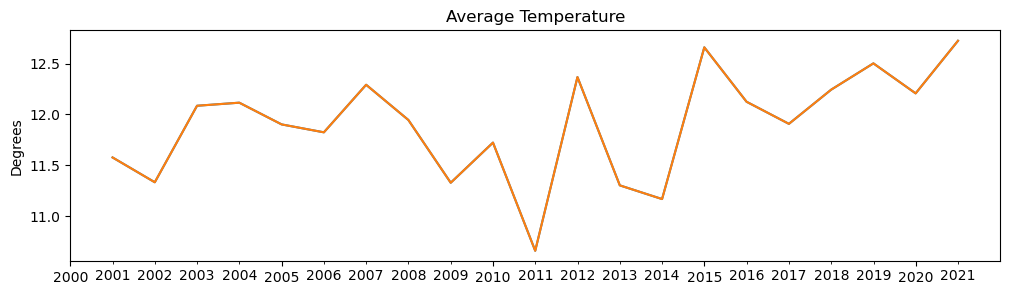

In [110]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(ts2)


ax.set_title('Average Temperature')
ax.set_ylabel('Degrees')


# major and minor formatter

major_loc = mdates.YearLocator(base=5)
fmt_year = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(fmt_year)

loc_minor = mdates.YearLocator()
fmt_minor = mdates.DateFormatter('%Y')

ax.xaxis.set_minor_locator(loc_minor)
ax.xaxis.set_minor_formatter(fmt_minor)

min_avg_temp_date = ts2.idxmin()
min_ag_temp_value =ts2.min()

## Plot the data
ax.plot(ts2);
fig = ax.get_figure();

In [106]:
min_avg_temp_date = ts2.idxmin()
min_avg_temp_date

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [107]:
print(f'The year with the coolest average between 2000-2020 was: {min_avg_temp_date}.')

The year with the coolest average between 2000-2020 was: 2010-12-31 00:00:00.
